## **1. Data Cleaning & Normalization**

**OVERVIEW**
This module transforms raw financial data into a "Trade-Ready" universe. Crucially, it handles **Currency Normalization**, ensuring all assets are denominated in the Portfolio Base Currency (GBP).

**KEY STEPS**
1.  **Load Manifest**: Reads the metadata generated in Step 0.
2.  **FX Normalization**:
    * Assets in `USD`, `EUR`, etc., are converted to `GBP`.
    * Formula: $P_{gbp} = P_{local} / FX_{rate}$ (assuming Yahoo `GBPXXX=X` convention).
3.  **Time Alignment**: Joins all series on a common Datetime Index using `inner` join initially, then handling gaps.
4.  **Imputation**: Uses Forward Fill (`ffill`) to handle minor data gaps (e.g., holidays).

**OUTPUT**
* `data/processed/asset_universe.csv`: A clean, currency-aligned matrix of Adjusted Close prices.

#### **1.1 Importing necessary libraries**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.preprocessing import convert_currency

# Parameters
TARGET_CURRENCY = "GBP" # Must match what was set in 00_notebook

#### **1.2 Loading datasets**

In [12]:
asset_universe = convert_currency(target_currency=TARGET_CURRENCY)
asset_universe

2025-12-22 22:44:25,129 - INFO - Starting data processing and normalization engine...
2025-12-22 22:44:25,286 - INFO - Converted AMZN from USD to GBP
2025-12-22 22:44:25,305 - INFO - Converted BNO from USD to GBP
2025-12-22 22:44:25,321 - INFO - Converted EURUSD=X from USD to GBP
2025-12-22 22:44:25,340 - INFO - Converted GLD from USD to GBP
2025-12-22 22:44:25,356 - INFO - Converted IEF from USD to GBP
2025-12-22 22:44:25,370 - INFO - Market Correction (.L): Renaming currency GBP -> GBp
2025-12-22 22:44:25,372 - INFO - Normalized ISF.L: GBp -> GBP (Divisor: 100)
2025-12-22 22:44:25,391 - INFO - Converted JPM from USD to GBP
2025-12-22 22:44:25,407 - INFO - Converted MSFT from USD to GBP
2025-12-22 22:44:25,425 - INFO - Converted NVDA from USD to GBP
2025-12-22 22:44:25,442 - INFO - Converted ORCL from USD to GBP
2025-12-22 22:44:25,460 - INFO - Converted QQQ from USD to GBP
2025-12-22 22:44:25,477 - INFO - Converted SLV from USD to GBP
2025-12-22 22:44:25,492 - INFO - Converted SPY fr

,AMZN,BNO,EURUSD,GLD,IEF,IRX,ISFL,JPM,MSFT,NVDA,ORCL,QQQ,SLV,SPY,TLT,UNG,USDJPY,USO,UUP
Date,,,,,,,,,,,,,,,,,,,
2019-01-02,60.337740,12.199818,0.898656,95.128786,69.667595,0.02365,6.636475,63.991578,74.181009,2.647867,31.953578,116.367548,11.415768,176.407585,78.842910,76.805536,0.784138,61.783141,17.570973
2019-01-03,59.906182,12.601908,0.903864,97.772601,71.524480,0.02355,6.592589,64.252798,72.778026,2.534060,32.229877,114.654682,11.779350,175.393541,81.219868,77.336423,0.798913,63.568560,17.799327
2019-01-04,62.372841,12.811971,0.901991,96.161051,70.346277,0.02358,6.728231,66.057550,75.518163,2.673586,33.334393,118.548087,11.663803,179.734098,79.600194,79.469062,0.791885,64.487451,17.620973
2019-01-07,63.977822,12.768002,0.895994,95.689345,69.566150,0.02353,6.709283,65.552507,74.984218,2.791664,33.580245,118.959616,11.519471,179.641343,78.703995,76.576600,0.785350,64.640955,17.398605
2019-01-08,64.780567,12.951576,0.897830,95.048618,69.114953,0.02400,6.757155,65.167273,75.225879,2.711279,33.749059,119.555644,11.489049,180.604045,78.183267,77.396620,0.782220,65.696404,17.383721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,182.736099,23.511166,0.830177,192.620840,70.859095,0.04200,7.894415,189.307480,347.930847,111.836929,135.404143,421.210610,21.556557,474.149151,67.115682,12.876492,0.797974,58.757973,23.431387
2024-12-25,182.736099,23.511166,0.829814,192.620840,70.859095,0.04200,7.894415,189.307480,347.930847,111.836929,135.404143,421.210610,21.556557,474.149151,67.115682,12.876492,0.797902,58.757973,23.431387
2024-12-26,181.006534,23.398114,0.829063,193.777842,70.860433,0.04215,7.894415,189.815439,346.708086,111.523094,135.517113,420.613186,21.636279,473.830068,67.027868,12.253118,0.797237,58.299965,23.366225


#### **1.3 Visual Sanity Check**

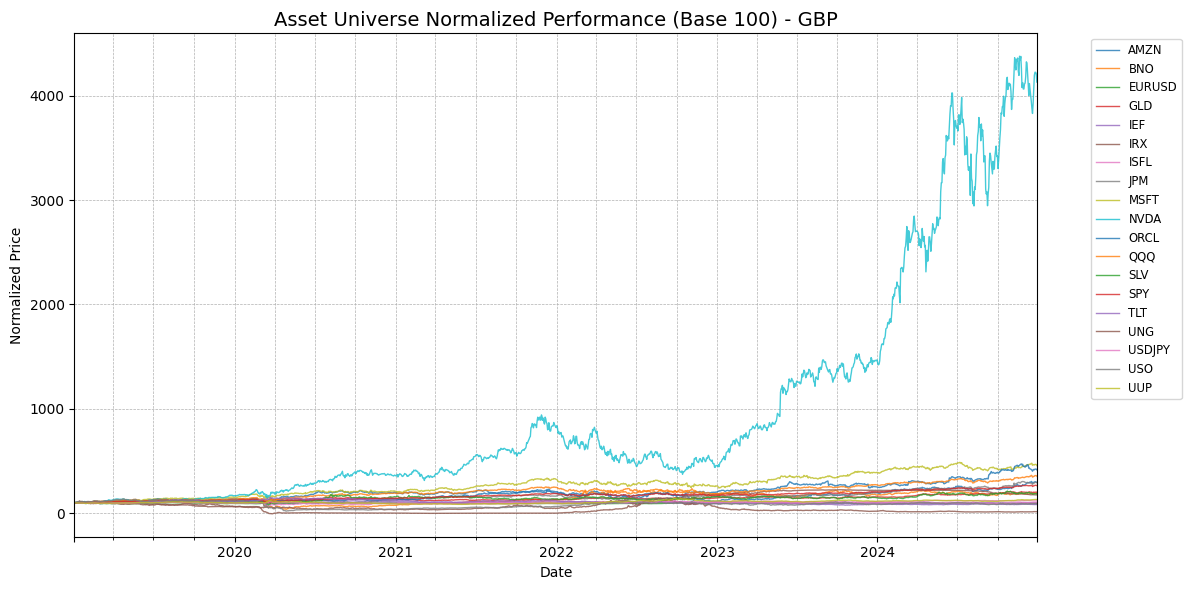

In [13]:
# Plotting all assets rebased to 100 to compare relative performance and spot outliers.
# This helps identifying data spikes or bad conversions visually.

plt.figure(figsize=(12, 6))
normalized_prices = (asset_universe / asset_universe.iloc[0]) * 100
normalized_prices.plot(ax=plt.gca(), linewidth=1, alpha=0.8)

plt.title(f"Asset Universe Normalized Performance (Base 100) - {TARGET_CURRENCY}", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### **1.4 Statistical analysis**

In [14]:
# Checking for data integrity issues (Zeros, NaNs, Negative prices)

print("Data Integrity Report:")
print("-" * 30)
print(f"Total Missing Values (NaNs): {asset_universe.isna().sum().sum()}")
print(f"Total Zero Values: {(asset_universe == 0).sum().sum()}")
print(f"Total Negative Values: {(asset_universe < 0).sum().sum()}")

# Quick look at descriptive statistics to catch scale errors
# (e.g. if one asset has a mean of 100,000 while others are 100, it might be a currency bug)
display(asset_universe.describe().loc[['count', 'mean', 'min', 'max', 'std']].round(2))

Data Integrity Report:
------------------------------
Total Missing Values (NaNs): 0
Total Zero Values: 0
Total Negative Values: 7


,AMZN,BNO,EURUSD,GLD,IEF,IRX,ISFL,JPM,MSFT,NVDA,ORCL,QQQ,SLV,SPY,TLT,UNG,USDJPY,USO,UUP
count,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00,1564.00
mean,106.50,17.89,0.87,134.82,73.94,0.02,7.13,101.28,202.81,25.55,63.71,243.15,16.22,298.45,84.29,42.03,0.78,52.30,19.09
min,59.91,4.84,0.82,91.81,66.66,-0.00,4.92,57.99,72.78,2.48,28.59,114.65,9.25,175.39,62.07,9.65,0.70,13.72,15.15
max,184.46,29.12,0.94,198.53,90.37,0.05,8.29,195.31,362.48,115.91,151.29,423.91,24.45,474.15,120.72,114.37,0.93,84.98,25.38
std,26.47,6.07,0.02,22.92,4.70,0.02,0.61,29.49,75.81,28.95,26.30,72.12,3.01,71.03,13.57,23.93,0.04,17.37,2.19


#### **1.5 Correlation matrix**

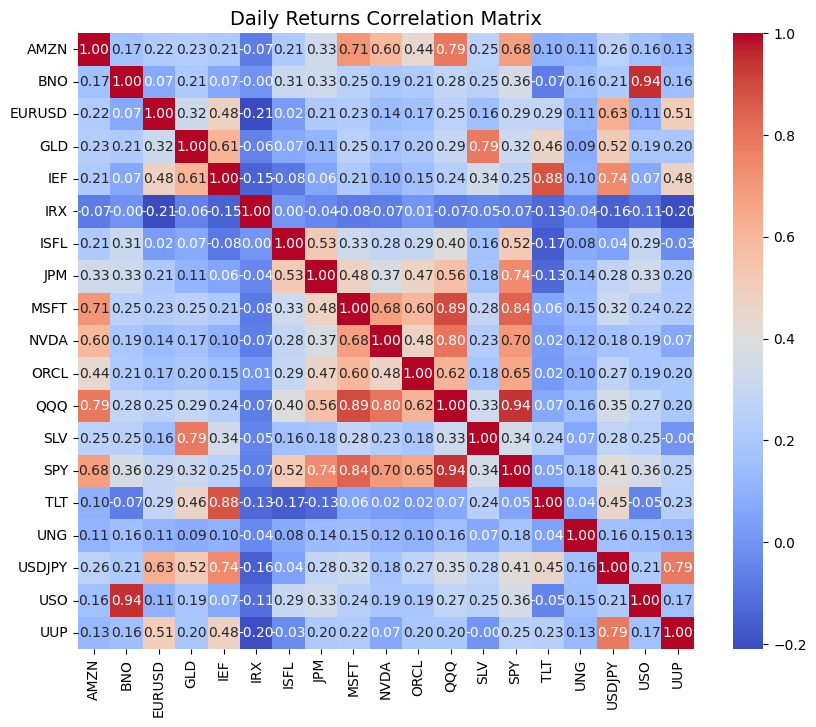

In [15]:
# Verifying expected relationships
plt.figure(figsize=(10, 8))
corr_matrix = asset_universe.pct_change().corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Daily Returns Correlation Matrix", fontsize=14)
plt.show()